In [1]:
!pip install pykrakenapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pykrakenapi: filename=pykrakenapi-0.3.1-py3-none-any.whl size=25382 sha256=910ab6cb80c65575bd469d63f58e86abfe87868b16600f79d8bc79cb217e8e31
  Stored in directory: /root/.cache/pip/wheels/ad/48/80/a9e45d006e0a170a2f8f3e2b366c977fbe866a0bbe6c932d81
  Created wheel for krakenex: filename=krakenex-2.1.0-py3-none-any.whl size=22515 sha256=72ada6c0776eeed2fd684c33a4773f2b190a85674084730599a078f1d1ca757a
  Stored in directory: /root/.cache/pip/wheels/24/d4/6d/b8a59e71f1950c5dfb217fa24b74a868140e064070ec4bf9c4
Successfully built pykrakenapi krakenex


In [2]:
!pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 8.0 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=419f9efa7917d5fae47f7381963d36e1c111f253a99a858c4a9342ed045cef9b
  Stored in directory: /root/.cache/pip/wheels/54/4a/75/06b8e63fce6f6d2c1baae5c208edb18eca128407b0c96e1153
Successfully built pandas-ta


In [32]:
import requests
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas_ta as pta


##1: LECTURA Y REPRESENTACIÓN DEL MOVIMIENTO DEL PAR DE MONEDAS


### 1.1 Descargar datos con la librería Kraken 

In [4]:
import krakenex            
from pykrakenapi import KrakenAPI

### 1.2 Graficar las cotizaciones




#### 1.2.1 Obtención del par ETH/USDT

Comenzamos desarrollando la obtención del par de monedas

In [5]:
# input: Ninguno
# output: Lista de pares de monedas
def obtenerPares():
  krakenAPI = krakenex.API()
  kraken = KrakenAPI(krakenAPI)
  pares = kraken.get_tradable_asset_pairs()
  lista_pares = pares["wsname"].values.tolist()
  return(lista_pares)

In [6]:
obtenerPares()

['1INCH/EUR',
 '1INCH/USD',
 'AAVE/AUD',
 'AAVE/ETH',
 'AAVE/EUR',
 'AAVE/GBP',
 'AAVE/USD',
 'AAVE/XBT',
 'ACA/EUR',
 'ACA/USD',
 'ACH/EUR',
 'ACH/USD',
 'ADA/AUD',
 'ADA/ETH',
 'ADA/EUR',
 'ADA/GBP',
 'ADA/USD',
 'ADA/USDT',
 'ADA/XBT',
 'ADX/EUR',
 'ADX/USD',
 'AGLD/EUR',
 'AGLD/USD',
 'AIR/EUR',
 'AIR/USD',
 'AKT/EUR',
 'AKT/USD',
 'ALCX/EUR',
 'ALCX/USD',
 'ALGO/ETH',
 'ALGO/EUR',
 'ALGO/GBP',
 'ALGO/USD',
 'ALGO/USDT',
 'ALGO/XBT',
 'ALICE/EUR',
 'ALICE/USD',
 'ALPHA/EUR',
 'ALPHA/USD',
 'ANKR/EUR',
 'ANKR/GBP',
 'ANKR/USD',
 'ANKR/XBT',
 'ANT/ETH',
 'ANT/EUR',
 'ANT/USD',
 'ANT/XBT',
 'APE/EUR',
 'APE/USD',
 'APE/USDT',
 'API3/EUR',
 'API3/USD',
 'APT/EUR',
 'APT/USD',
 'ARPA/EUR',
 'ARPA/USD',
 'ASTR/EUR',
 'ASTR/USD',
 'ATLAS/EUR',
 'ATLAS/USD',
 'ATOM/AUD',
 'ATOM/ETH',
 'ATOM/EUR',
 'ATOM/GBP',
 'ATOM/USD',
 'ATOM/USDT',
 'ATOM/XBT',
 'AUDIO/EUR',
 'AUDIO/USD',
 'AUD/JPY',
 'AUD/USD',
 'AVAX/EUR',
 'AVAX/USD',
 'AVAX/USDT',
 'AXS/EUR',
 'AXS/USD',
 'BADGER/EUR',
 'BADGER/USD

No todas las criptomonedas tienen cambio a todas las monedas, por ello, es posible que el usuario quiera comprobar un caso concreto.

In [7]:
def comprobarCambio(moneda1, moneda2):
  listaParacomprobar=obtenerPares()
  monedaComprobar = moneda1 
  parBuscado=moneda1+'/'+moneda2
  if parBuscado in listaParacomprobar:
    print('Existe el cambio '+parBuscado)
    return True
  print('No existe dicho cambio')
  return False

In [8]:
comprobarCambio('ETH', 'USDT')

Existe el cambio ETH/USDT


True

#### 1.2.2 Obtención de la información y gráfica par ETH/USDT

In [9]:
# input: el par de monedas del que debemos obtener información. Debe estar en formato: 'BTCEUR'
# output: Nos hace display del DataFrame con toda su información, dibuja el gráfico de cotización y devuelve el DataFrame 
def obtenerInfo(parMonedas):
  resp = requests.get('https://api.kraken.com/0/public/OHLC?pair='f'{parMonedas}')
  info=resp.json()
  a=list(info['result'].keys())
  aliasPar=a[0]
  df = pd.DataFrame(resp.json()['result'][aliasPar])
  df.columns = ['unixtimestap', 'open', 'high', 'low', 'close', 'vwap', 'volume', 'count']
  %matplotlib inline
  df.close.astype(float).plot(figsize=(12,8))
  display(df)
  return(df)

,unixtimestap,open,high,low,close,vwap,volume,count
0,1672202460,1198.60,1198.60,1198.60,1198.60,0.00,0.00000000,0
1,1672202520,1198.60,1198.60,1198.60,1198.60,0.00,0.00000000,0
2,1672202580,1198.60,1198.60,1198.60,1198.60,0.00,0.00000000,0
3,1672202640,1198.60,1198.60,1198.60,1198.60,0.00,0.00000000,0
4,1672202700,1198.93,1199.08,1198.93,1199.08,1198.98,0.02438569,2
...,...,...,...,...,...,...,...,...
715,1672245360,1192.70,1192.70,1192.70,1192.70,0.00,0.00000000,0
716,1672245420,1192.70,1192.70,1192.70,1192.70,0.00,0.00000000,0
717,1672245480,1192.70,1192.70,1192.70,1192.70,0.00,0.00000000,0
718,1672245540,1192.70,1192.70,1192.70,1192.70,0.00,0.00000000,0


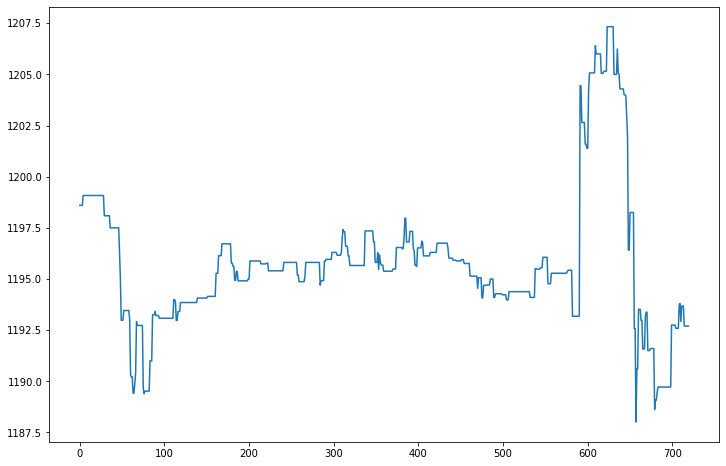

In [16]:
df=obtenerInfo('ETHUSDT')

Otro ejemplo, pero esta vez con el bitcoin

,unixtimestap,open,high,low,close,vwap,volume,count
0,1672202160,16655.4,16655.5,16655.4,16655.5,16655.4,0.00837553,2
1,1672202220,16653.2,16653.2,16653.2,16653.2,16653.2,0.00395178,2
2,1672202280,16653.2,16653.2,16653.2,16653.2,0.0,0.00000000,0
3,1672202340,16652.7,16653.2,16652.7,16653.2,16652.9,0.00346200,2
4,1672202400,16653.2,16653.2,16653.2,16653.2,0.0,0.00000000,0
...,...,...,...,...,...,...,...,...
715,1672245060,16619.4,16623.2,16617.8,16623.2,16619.1,1.17740501,8
716,1672245120,16623.2,16623.2,16623.2,16623.2,0.0,0.00000000,0
717,1672245180,16619.2,16620.4,16619.2,16620.4,16619.3,0.58373887,2
718,1672245240,16621.1,16621.1,16621.1,16621.1,16621.1,0.00020903,1


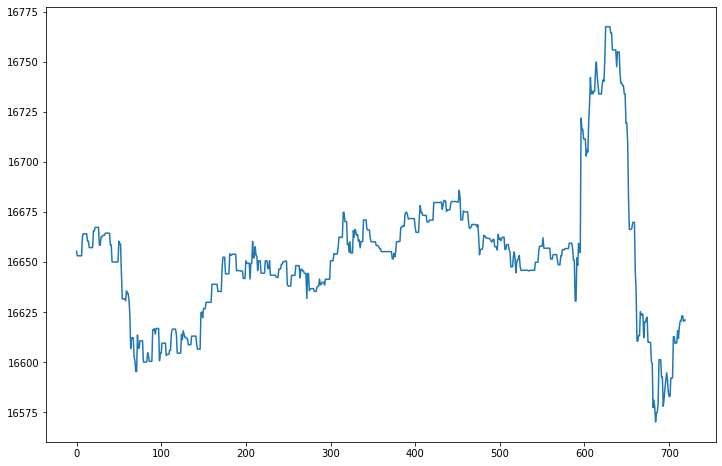

In [11]:
dfPrueba=obtenerInfo('BTCUSDT')

Además, se ha creado una función para a que hora se alcanzó el máximo y mínimo precio de cotización de las monedas. 

In [12]:
# Obtenemos los momentos en los que la moneda ha llegado a su punto de cotización más alto y más bajo
def getPeaknFloor(df):
  df['vwap'] = df['vwap'].astype(float)     # Convertimos a float porque originalmente el df nos lo devuelve formato string
  dfOrdenado=df.sort_values(by=['vwap'], ascending=False)   # Ordenamos según vwap
  filaDeMáximoValor=df['vwap'].idxmax()   # Usamos funcion idxmax() de Pandas para obtener la fila donde se encuentra el máximo
  HoraMaxValue=dfOrdenado.loc[filaDeMáximoValor]['unixtimestap']
  HoraMinValue=dfOrdenado.iloc[-1]['unixtimestap']
  print('Hora máxima: ' + f'{HoraMaxValue}')
  print('Hora mínima: ' +  f'{HoraMinValue}')

In [13]:
getPeaknFloor(dfPrueba)

Hora máxima: 1672240020
Hora mínima: 1672245300


------------------------------------------------------------------------------

Cuando obtenemos los datos de la API de Kraken nos da la información de cotización de las últimas 12 horas. Por ello, hemos creado la siguiente función para el caso que queramos la información referente a las últimas x horas. 

Estas horas que elijamos es el parámetro horasBack, y el otro parámetro de entrada, df, será el DataFrame que tendrá la información de cotización. 


In [15]:
def calculoDeHora(df, horasBack):
  horaX=horasBack*3600
  ultimaHora=df.iloc[-1]['unixtimestap']
  fromHora=ultimaHora-horaX
  dfFinal=df[df.unixtimestap > fromHora]
  %matplotlib inline
  dfFinal.close.astype(float).plot(figsize=(12,8))
  return (dfFinal)

,unixtimestap,open,high,low,close,vwap,volume,count
540,1672234860,1195.48,1195.48,1195.48,1195.48,1195.48,0.11274631,1
541,1672234920,1195.48,1195.48,1195.48,1195.48,0.00,0.00000000,0
542,1672234980,1195.48,1195.48,1195.48,1195.48,0.00,0.00000000,0
543,1672235040,1195.48,1195.48,1195.48,1195.48,0.00,0.00000000,0
544,1672235100,1195.56,1195.56,1195.55,1195.55,1195.55,0.49138000,2
...,...,...,...,...,...,...,...,...
715,1672245360,1192.70,1192.70,1192.70,1192.70,0.00,0.00000000,0
716,1672245420,1192.70,1192.70,1192.70,1192.70,0.00,0.00000000,0
717,1672245480,1192.70,1192.70,1192.70,1192.70,0.00,0.00000000,0
718,1672245540,1192.70,1192.70,1192.70,1192.70,0.00,0.00000000,0


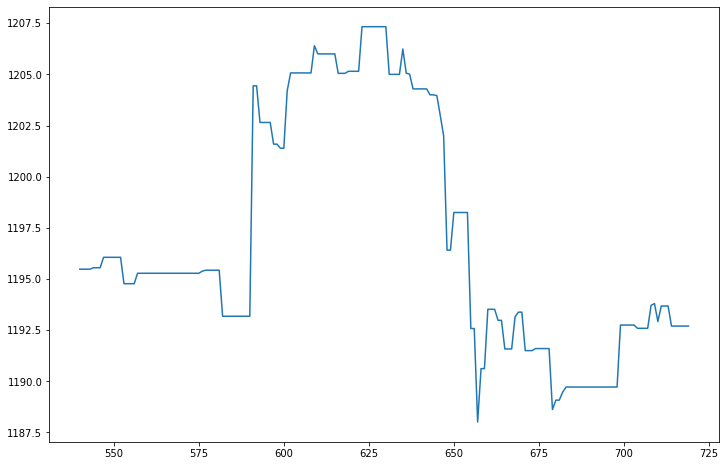

In [17]:
calculoDeHora(df, 3)

Aquí se puede observar como ha variado el Ethereum con respecto al Dolar en las últimas 3 horas.

## 2: INDICADORES TÉCNICOS


### 2.1 Media Móvil

#### 2.1.1 Cálculo Media Móvil

In [18]:
df['close'] = df['close'].astype(float)

In [19]:
# OBTENGO LA SUMA DEK PRECIO DE CIERRE DE X SESIONES
sumaPrecioCierreXSesiones = df['close'].sum()
print(sumaPrecioCierreXSesiones)

860948.76


In [20]:
# AVERIGUO CUÁNTAS SON LAS X SESIONES
xSesiones=df['close'].count()
print(xSesiones)

720


In [21]:
mediaAritmetica=sumaPrecioCierreXSesiones/xSesiones
print(mediaAritmetica)

1195.7621666666666


Si quisiera hacer parametrizable (elegir sobre cuántas sesiones realizar la Media Móvil Simple)

In [22]:
listaDeCierres = df['close'].tolist()
print(listaDeCierres)

[1198.6, 1198.6, 1198.6, 1198.6, 1199.08, 1199.08, 1199.08, 1199.08, 1199.08, 1199.08, 1199.08, 1199.08, 1199.08, 1199.08, 1199.08, 1199.08, 1199.08, 1199.08, 1199.08, 1199.08, 1199.08, 1199.08, 1199.08, 1199.08, 1199.08, 1199.08, 1199.08, 1199.08, 1199.08, 1198.09, 1198.09, 1198.09, 1198.09, 1198.09, 1198.09, 1198.09, 1197.5, 1197.5, 1197.5, 1197.5, 1197.5, 1197.5, 1197.5, 1197.5, 1197.5, 1197.5, 1197.5, 1196.24, 1195.0, 1192.98, 1192.98, 1192.98, 1193.46, 1193.46, 1193.46, 1193.46, 1193.46, 1193.46, 1193.46, 1192.98, 1190.3, 1190.22, 1190.22, 1189.42, 1189.42, 1189.88, 1190.41, 1192.92, 1192.73, 1192.73, 1192.73, 1192.73, 1192.73, 1192.73, 1192.73, 1189.66, 1189.4, 1189.52, 1189.52, 1189.52, 1189.52, 1189.52, 1189.52, 1191.0, 1191.0, 1191.0, 1193.25, 1193.25, 1193.25, 1193.42, 1193.21, 1193.21, 1193.21, 1193.21, 1193.08, 1193.08, 1193.08, 1193.08, 1193.08, 1193.08, 1193.08, 1193.08, 1193.08, 1193.08, 1193.08, 1193.08, 1193.08, 1193.08, 1193.08, 1193.08, 1193.08, 1193.99, 1193.99, 119

In [23]:
def mediaMovilSimple(listaValores, sesiones):
  pesos = np.repeat(1.0, sesiones)/sesiones
  movingAverage=np.convolve(listaValores, pesos, 'valid')
  return movingAverage

#### 2.1.2 Gráfica de la Media Móvil

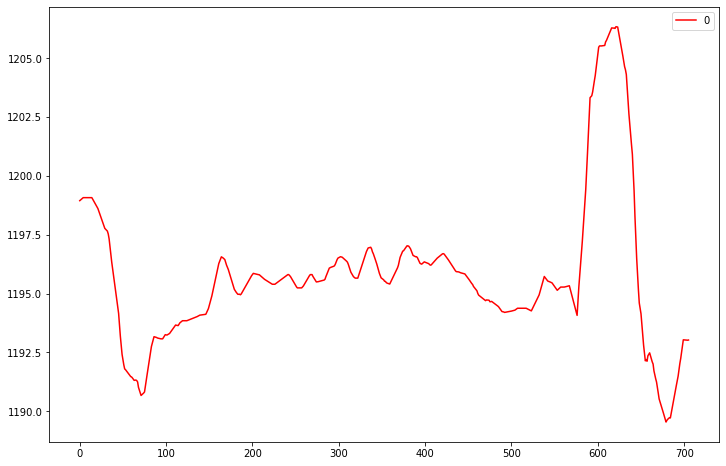

In [24]:
movingAverage=mediaMovilSimple(listaDeCierres, 15)
mms = pd.DataFrame.from_dict(movingAverage)
line2=mms.plot(figsize=(12,8), color='r')

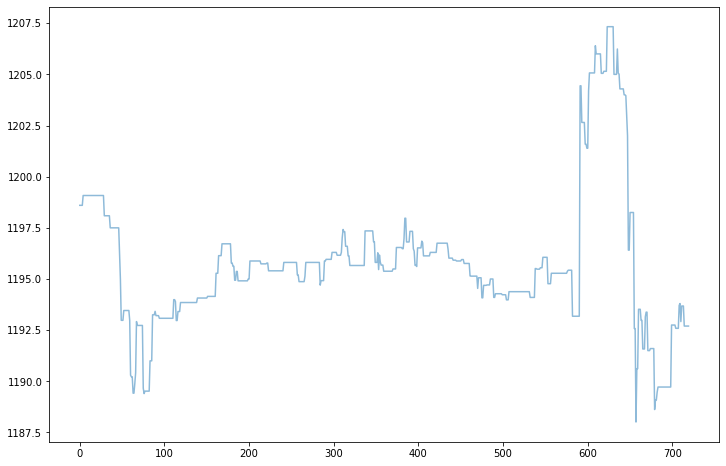

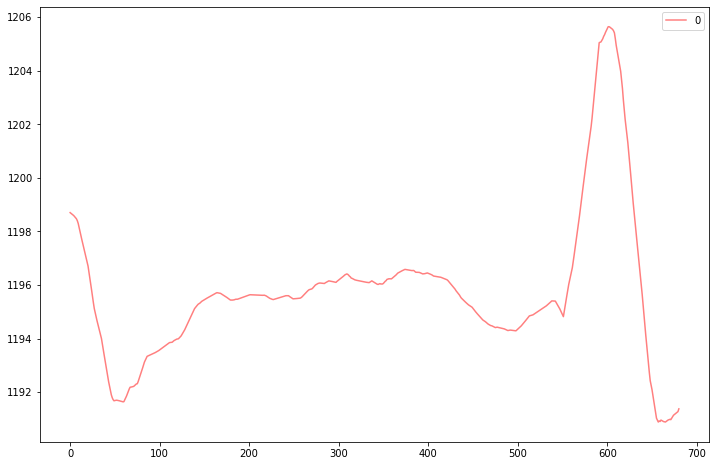

In [25]:
movingAverage=mediaMovilSimple(listaDeCierres, 40)
sma = pd.DataFrame.from_dict(movingAverage)
%matplotlib inline
overlapping = 0.5
df1=df.close.astype(float)
df1.plot(figsize=(12,8), alpha=overlapping)
line2=sma.plot(figsize=(12,8), color='r', alpha=overlapping)
plt.show()

#### 2.1.3 Gráfica Media Móvil junto con la cotización del par calculado

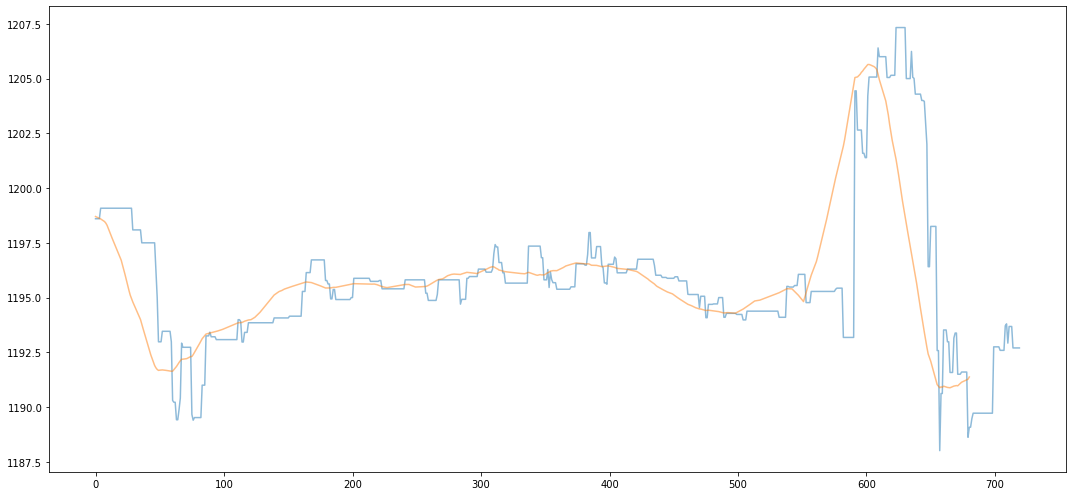

In [26]:
plt.rcParams["figure.figsize"] = [15, 7]
plt.rcParams["figure.autolayout"] = True
overlapping = 0.5
line1=plt.plot(df1, alpha=overlapping)
line2=plt.plot(sma, alpha=overlapping)
plt.show()

### 2.2 RSI


#### 2.2.1 Cálculo del RSI

,unixtimestap,open,high,low,close,vwap,volume,count
0,1672204200,1198.09,1198.09,1198.09,1198.09,1198.09,0.05837809,1
1,1672204260,1198.09,1198.09,1198.09,1198.09,0.00,0.00000000,0
2,1672204320,1198.09,1198.09,1198.09,1198.09,0.00,0.00000000,0
3,1672204380,1198.09,1198.09,1198.09,1198.09,0.00,0.00000000,0
4,1672204440,1198.09,1198.09,1198.09,1198.09,0.00,0.00000000,0
...,...,...,...,...,...,...,...,...
715,1672247100,1191.35,1191.35,1191.35,1191.35,0.00,0.00000000,0
716,1672247160,1191.35,1191.35,1191.35,1191.35,0.00,0.00000000,0
717,1672247220,1192.10,1192.11,1192.10,1192.11,1192.10,0.73317200,2
718,1672247280,1192.11,1192.11,1192.11,1192.11,0.00,0.00000000,0


0      1198.09
1      1198.09
2      1198.09
3      1198.09
4      1198.09
        ...   
715    1191.35
716    1191.35
717    1192.11
718    1192.11
719    1192.11
Name: close, Length: 720, dtype: float64

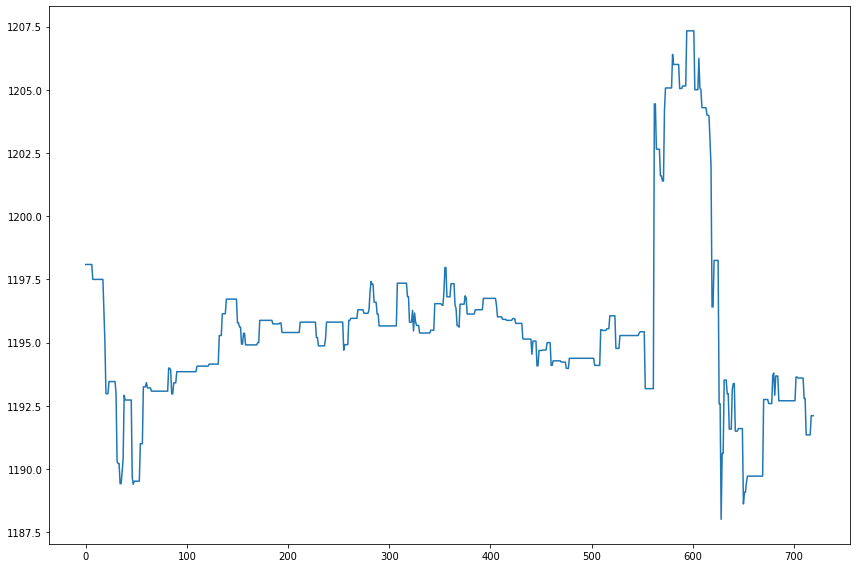

In [27]:
df=obtenerInfo('ETHUSDT')
df1=df['close'].astype(float)
df1

In [28]:
df

,unixtimestap,open,high,low,close,vwap,volume,count
0,1672204200,1198.09,1198.09,1198.09,1198.09,1198.09,0.05837809,1
1,1672204260,1198.09,1198.09,1198.09,1198.09,0.00,0.00000000,0
2,1672204320,1198.09,1198.09,1198.09,1198.09,0.00,0.00000000,0
3,1672204380,1198.09,1198.09,1198.09,1198.09,0.00,0.00000000,0
4,1672204440,1198.09,1198.09,1198.09,1198.09,0.00,0.00000000,0
...,...,...,...,...,...,...,...,...
715,1672247100,1191.35,1191.35,1191.35,1191.35,0.00,0.00000000,0
716,1672247160,1191.35,1191.35,1191.35,1191.35,0.00,0.00000000,0
717,1672247220,1192.10,1192.11,1192.10,1192.11,1192.10,0.73317200,2
718,1672247280,1192.11,1192.11,1192.11,1192.11,0.00,0.00000000,0


Forma 1:

In [29]:
def rsi(df, periods, ema = True):
    close_delta = df['close'].astype(float).diff()

    # Make two series: one for lower closes and one for higher closes
    altos = close_delta.clip(lower=0)
    bajos = -1 * close_delta.clip(upper=0)
    
    if ema == True:
	    # Use exponential moving average
        ma_up = altos.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = bajos.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = altos.rolling(window = periods, adjust=False).mean()
        ma_down = bajos.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up/ma_down
    rsi=100-(100/(1+rsi))
    return rsi

Forma 2:

In [33]:
dfPruebaRSI2=pta.rsi(df['close'].astype(float), length = 15)

#### 2.2.2 Gráfica del RSI

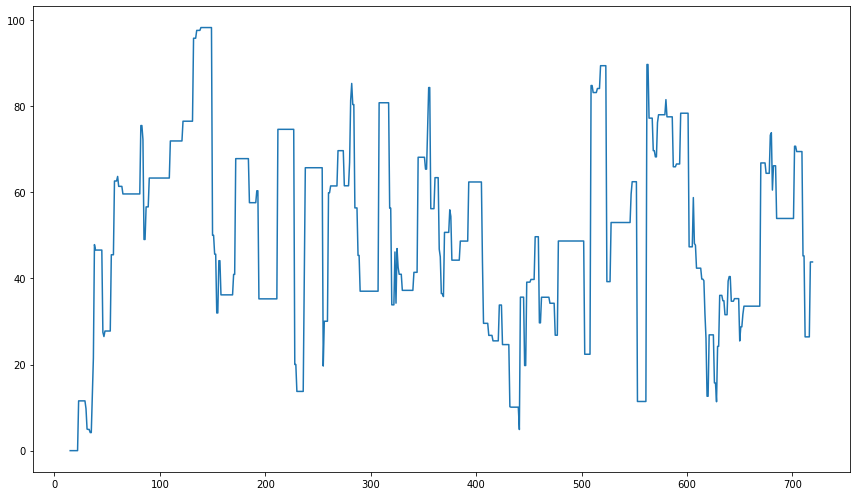

In [31]:
# Graficamos el RSI para 15 períodos
rsiPlot=rsi(df, 15, True)
rsiPlot.plot(figsize=(12,7))

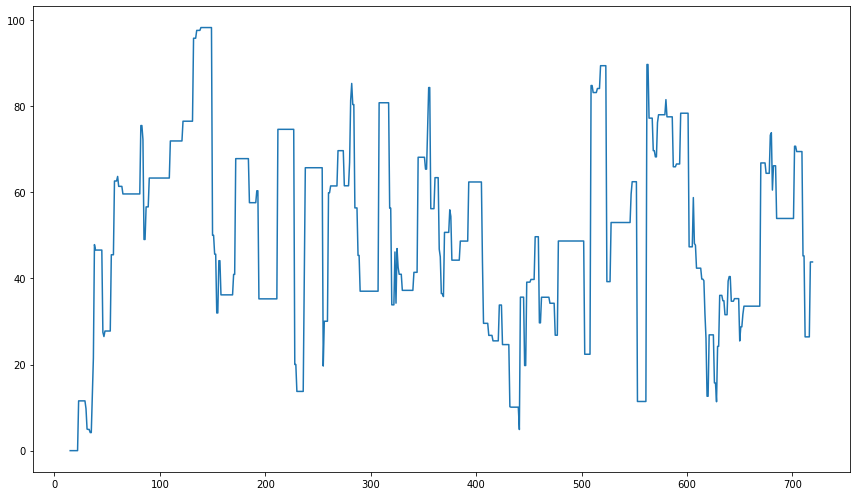

In [34]:
dfPruebaRSI2.plot(figsize=(12,7))